# Install Apple Inc. Stock Data via Yahoo Finance Library

In [1]:
%pip install yfinance

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 2.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.7-py3-none-any.whl.metadata (4.6 kB)
  Using cached cffi-1.17.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata (1.5 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
Using cached beautifulsoup4-4.13.4-py3-none-any.whl (187 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 2.6 MB/s eta 0:00:00a 0:00:01
Using cached cffi-1.17.1-cp311-cp311-macosx_10_9_x86_64.whl (182 kB)
Using cached soupsieve-2.7-py3-none-any.whl (36 kB)
Using cached pycparser-2.22-py3-none-any.whl (117 kB)
  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version

In [53]:
import yfinance
data = yfinance.download("AAPL", start="2015-01-01", end="2024-01-01")

/var/folders/jb/g3rwd6rn2t7gf564dxhf10hr0000gn/T/ipykernel_10863/3703970774.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yfinance.download("AAPL", start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


### Lets Look into The Data First!

In [54]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288578,24.757332,23.848704,24.746224,212818400
2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000
2015-01-06,23.606556,23.866481,23.244437,23.668760,263188400
2015-01-07,23.937571,24.037541,23.704304,23.815383,160423600
2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000


In [55]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,81.566078,82.392343,80.657667,81.497514,1.237614e+08
std,56.108763,56.683288,55.472432,56.053994,6.818417e+07
min,20.647455,20.951425,20.448615,20.569742,2.404830e+07
25%,32.883780,33.080372,32.702259,32.895964,7.831732e+07
50%,51.328684,52.141711,50.953616,51.475864,1.056556e+08
75%,139.310299,141.000070,136.804153,139.251731,1.486811e+08
max,196.669769,198.168786,195.567864,196.580427,6.488252e+08


In [56]:
print(f"Columns in the dataset:{len(data.columns)}")
data.columns.names

Columns in the dataset:5


FrozenList(['Price', 'Ticker'])

In [ ]:
data.reset_index(inplace=True)
data.head()

Price,index,Date,Close,High,Low,Open,Volume
Ticker,,,AAPL,AAPL,AAPL,AAPL,AAPL
0,0,2015-01-02,24.288578,24.757332,23.848704,24.746224,212818400
1,1,2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000
2,2,2015-01-06,23.606556,23.866481,23.244437,23.668760,263188400
3,3,2015-01-07,23.937571,24.037541,23.704304,23.815383,160423600
4,4,2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000


In [61]:
data.iloc[1]

Price   Ticker
index                               1
Date              2015-01-05 00:00:00
Close   AAPL                 23.60433
High    AAPL                24.137511
Low     AAPL                23.417718
Open    AAPL                24.057533
Volume  AAPL                257142000
Name: 1, dtype: object

In [ ]:
data.columns = data.columns.get_level_values(0)  # Or:
data.columns

Index(['index', 'Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

### Drop Cols Not Needed

In [77]:
data.drop(columns=['index'], inplace=True)

## Price is my Index Now!

In [79]:
data.tail()

Price,Date,Close,High,Low,Open,Volume
2259,2023-12-22,192.192551,193.989390,191.567126,193.761051,37149600
2260,2023-12-26,191.646561,192.480450,191.428159,192.202487,28919300
2261,2023-12-27,191.745834,192.093296,189.700813,191.090644,48087700
2262,2023-12-28,192.172714,193.244865,191.765691,192.728641,34049900
2263,2023-12-29,191.130325,192.986726,190.336138,192.490361,42672100


## Importing Visualization Libraries

In [236]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import pandas as pd

Text(0, 0.5, 'Price in USD')

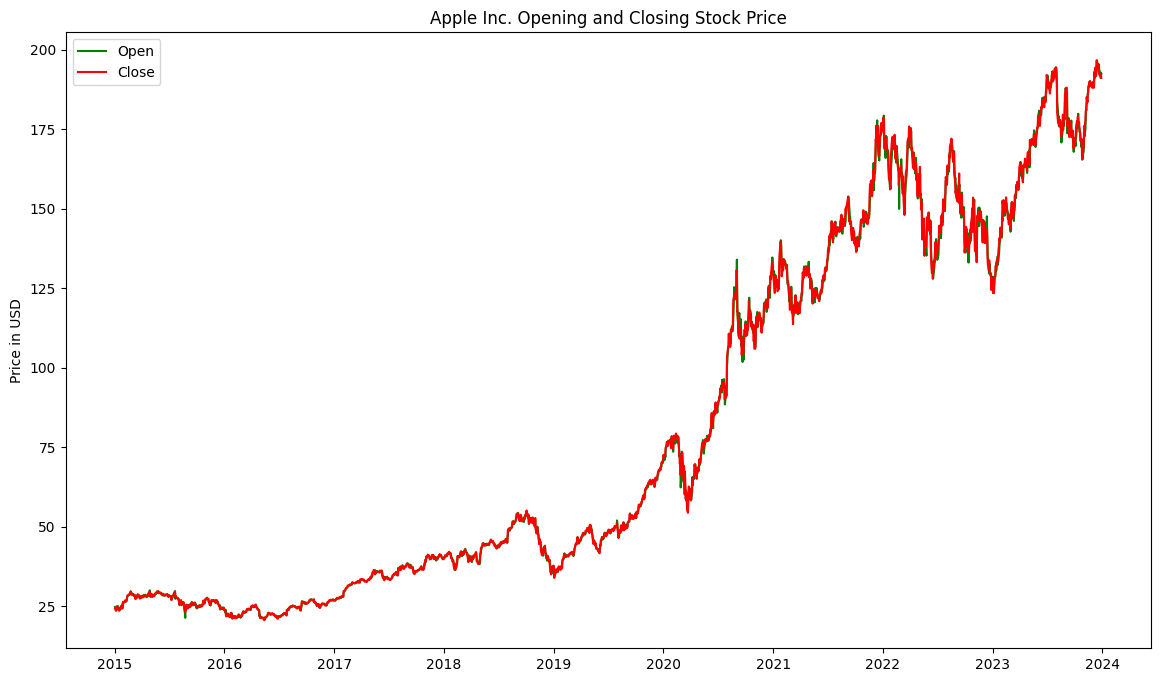

In [373]:
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['Open'],'g', label='Open')
plt.plot(data['Date'], data['Close'], 'r', label='Close')
plt.legend(['Open', 'Close'])
plt.title('Apple Inc. Opening and Closing Stock Price')
plt.ylabel('Price in USD')

Text(0, 0.5, 'Price in USD')

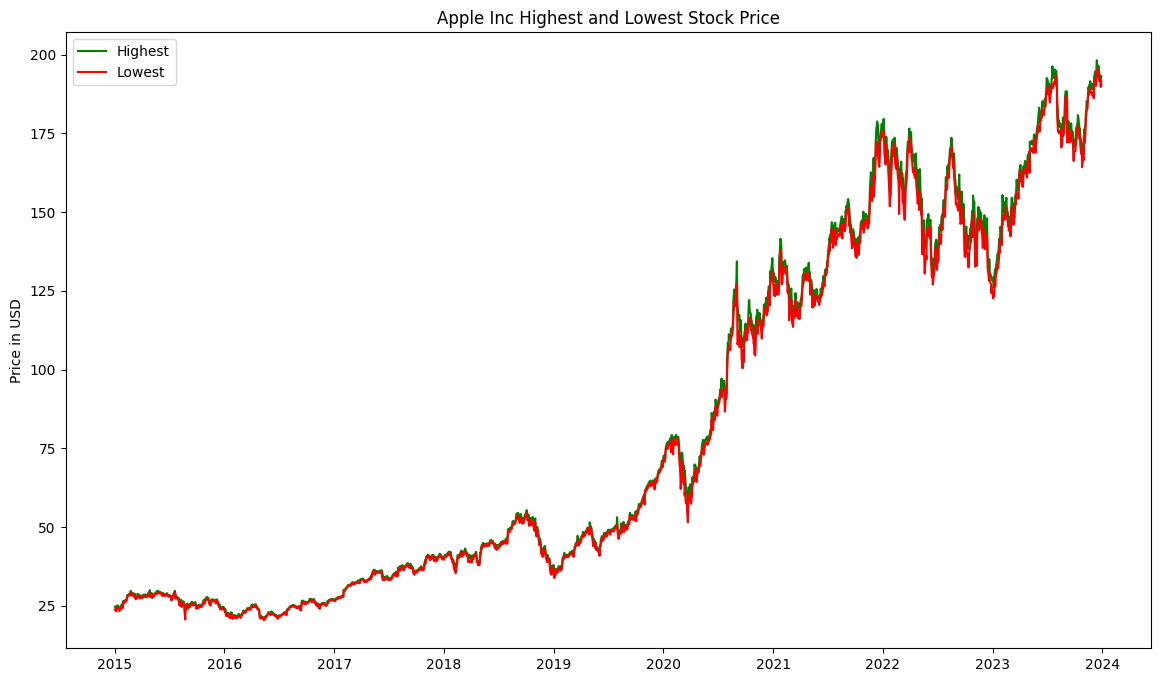

In [374]:
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['High'],'g', label='High')
plt.plot(data['Date'], data['Low'], 'r', label='Low')
plt.legend(['Highest', 'Lowest'])
plt.title('Apple Inc Highest and Lowest Stock Price')
plt.ylabel('Price in USD')

In [166]:
import numpy as np
insight_1 = np.sum(data['Close'] - data['High']) / len(data)
insight_2 = np.sum(data['Open'] - data['High']) / len(data)
insight_3 = np.sum(data['Low'] - data['High']) / len(data)
insight_4 = np.sum(data['Close'] - data['Low']) / len(data)
print(f"Average Difference between Highest and Closing Price: {insight_1} USD")
print(f"Average Difference between Highest and Opening Price: {insight_2} USD")
print(f"Average Difference between Highest and Lowest Price: {insight_3} USD")
print(f"Average Difference between Lowest and Closing Price: {insight_4} USD")

Average Difference between Highest and Closing Price: -0.8262643698192745 USD
Average Difference between Highest and Opening Price: -0.8948293413903611 USD
Average Difference between Highest and Lowest Price: -1.734676123876661 USD
Average Difference between Lowest and Closing Price: 0.9084117540573866 USD


Text(0, 0.5, 'Volume of Stocks Traded (in hundreds of millions)')

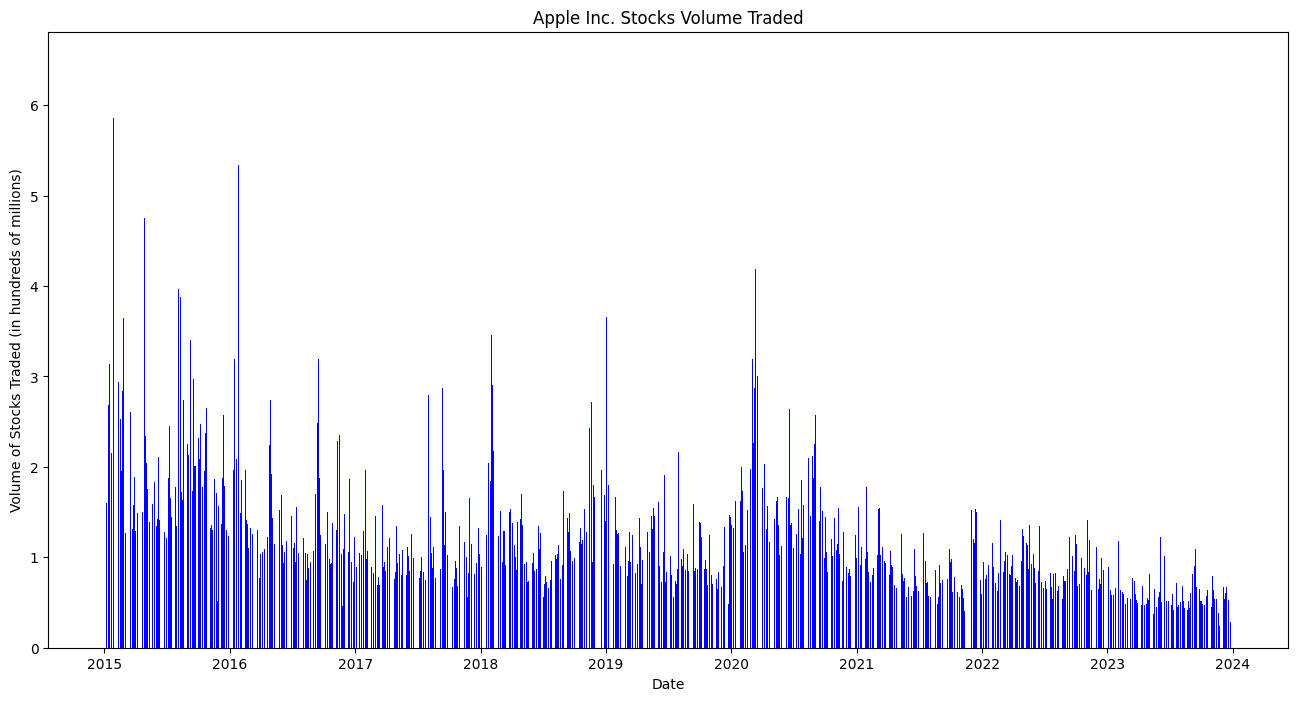

In [375]:
plt.figure(figsize=(16, 8))
plt.bar(data['Date'] ,data['Volume']/100000000, color='blue')
plt.title('Apple Inc. Stocks Volume Traded')
plt.xlabel(data['Date'].name)
plt.ylabel('Volume of Stocks Traded (in hundreds of millions)')

In [169]:
data.head()

Price,Date,Close,High,Low,Open,Volume
0,2015-01-02,24.288578,24.757332,23.848704,24.746224,212818400
1,2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000
2,2015-01-06,23.606556,23.866481,23.244437,23.668760,263188400
3,2015-01-07,23.937571,24.037541,23.704304,23.815383,160423600
4,2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000


In [212]:
max_volume = data['Volume'].max()/ 100000000  # Convert to millions
MaxDate = data.loc[data.groupby(data['Date'])['Volume'].idxmax(), 'Date'].values[0]
MaxDate = str(MaxDate)[:10]

/var/folders/jb/g3rwd6rn2t7gf564dxhf10hr0000gn/T/ipykernel_10863/2551613265.py:3: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(MaxDate, MaxDate)


Text(0, 0.5, 'Volume of Stocks Traded (in hundreds of millions)')

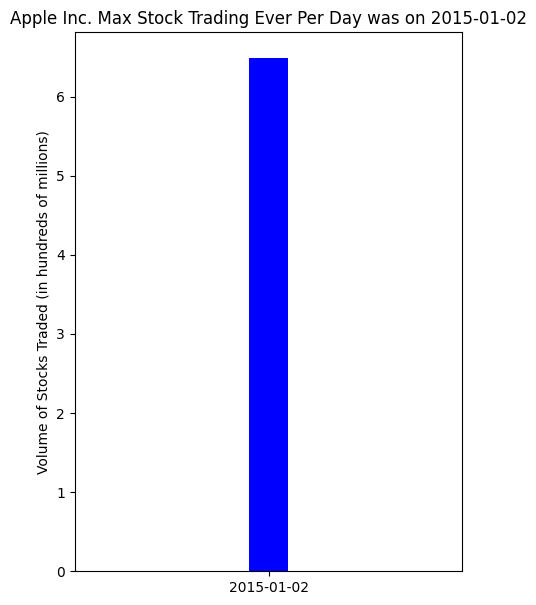

In [377]:
plt.figure(figsize=(5, 7))
plt.bar(MaxDate, max_volume, color='blue', width=0.01)
plt.xlim(MaxDate, MaxDate)
plt.title(f"Apple Inc. Max Stock Trading Ever Per Day was on {MaxDate}")
plt.ylabel('Volume of Stocks Traded (in hundreds of millions)')


# Define Your X and Y

In [258]:
XTrain = pd.DataFrame()
YTrain = pd.DataFrame()

# I will extract new feature => Day of the Week

In [285]:
dayofweek = data['Date'].dt.dayofweek
XTrain['WeekDay'] = dayofweek
XTrain['Open'] = data['Open']
XTrain['High'] = data['High']
XTrain['Low'] = data['Low']
XTrain['Volume'] = data['Volume']
YTrain = data['Close']

In [286]:
print(f"Length of Stocks: {len(YTrain)}")
print(f"Num of Features: {len(XTrain.columns)}")
print(f"Features: {XTrain.columns}")

Length of Stocks: 2264
Num of Features: 5
Features: Index(['Open', 'High', 'Low', 'Volume', 'WeekDay'], dtype='object')


# Start Training !

In [339]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [353]:
x_train, x_test, y_train, y_test = train_test_split(XTrain, YTrain, test_size=0.2, random_state=42)

In [354]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [355]:
model.score(x_test, y_test)


0.9998868946944625

In [356]:
ypred = model.predict(x_test)
meanSquaredError = mean_squared_error(y_test, ypred)
print(f"Mean Squared Error: {meanSquaredError:.2f}")

Mean Squared Error: 0.37


In [357]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, ypred)
print(f"MAE: {mae:.2f}")


MAE: 0.37


In [363]:
ypred = pd.DataFrame(ypred, columns=['Predicted Close'])
ypred['Actual Close'] = y_test.values

In [365]:
ypred[:20]

,Predicted Close,Actual Close
0,167.758439,169.792389
1,77.573546,77.722519
2,22.313772,22.375319
3,24.450067,24.525587
4,27.690322,27.518078
5,117.486723,117.215599
6,44.580150,44.611034
7,144.005194,144.209274
8,28.568159,28.481859
9,160.281529,160.528488


# Manually Computing The Error & Testing by Plotting

In [379]:
error = np.sum((ypred['Predicted Close'] - ypred['Actual Close'])**2) / len(ypred)
print(f"Average Prediction Error in USD: {error:.2f} USD")

Average Prediction Error in USD: 0.37 USD


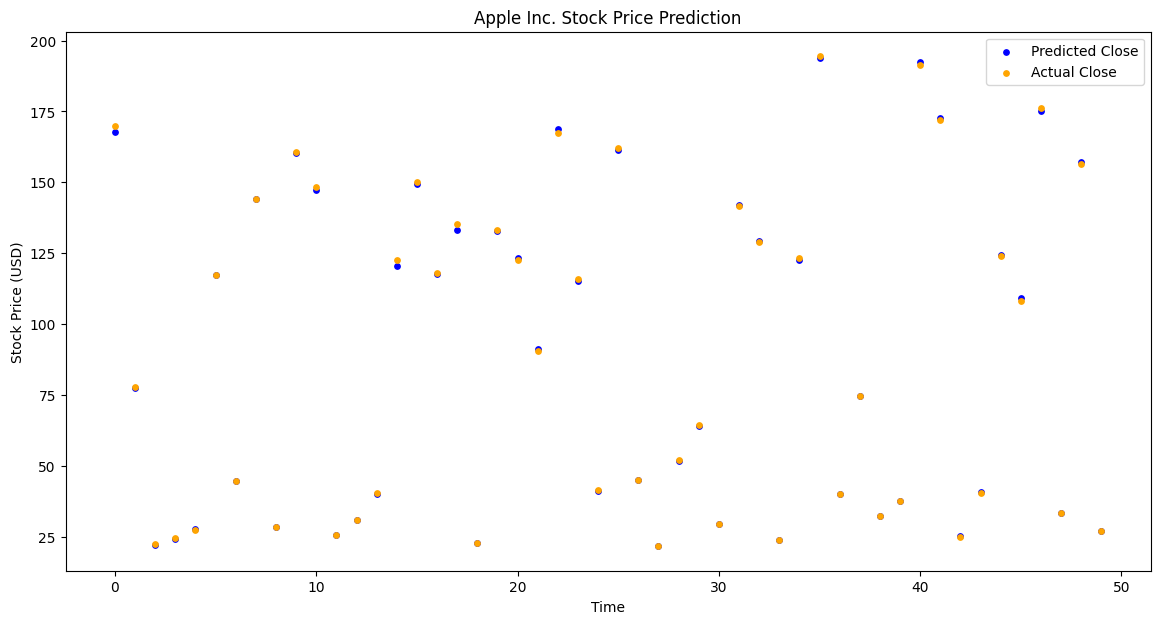

In [380]:
plt.figure(figsize=(14, 7))
plt.scatter(range(len(ypred[:50])), ypred['Predicted Close'][:50], label='Predicted Close', color='blue', s=15)
plt.scatter(range(len(ypred[:50])), ypred['Actual Close'][:50], label='Actual Close', color='orange', s=15)
plt.title('Apple Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Thank You! See You in The Next Project :)